In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
dataset = pd.read_csv("Mall_Customers.csv")      
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
X = dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [27]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_scaler = sc.fit_transform(x)

In [35]:
import skfuzzy as fuzz
n_clusters = 3 
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T,          # transpose because skfuzzy expects features as rows
    c=n_clusters,        # number of clusters
    m=2,                 # fuzziness parameter
    error=0.005,         # stopping criterion
    maxiter=1000,        # max iterations
    init=None)
print("Labels shape:", labels.shape)   # should match number of rows in X
print("Fuzzy Partition Coefficient (FPC):", fpc)


Labels shape: (200,)
Fuzzy Partition Coefficient (FPC): 0.6802115367982321


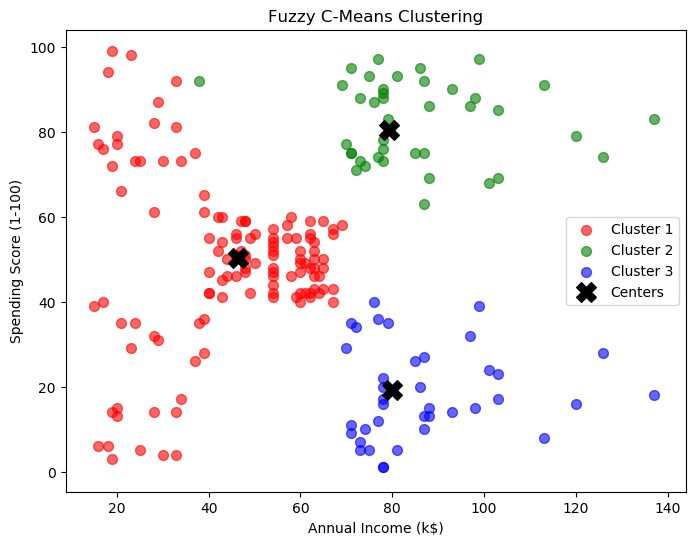

In [34]:
labels = np.argmax(u, axis=0)
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']  # add more if more clusters

for j, color in enumerate(colors[:n_clusters]):
    plt.scatter(X[labels == j, 0], X[labels == j, 1],c=color,label=f"Cluster {j+1}",s=50, alpha=0.6)

# Rescale cluster centers back to original space
centers = scaler.inverse_transform(cntr)
plt.scatter(
    centers[:, 0], centers[:, 1],c='black', marker='X', s=200, label='Centers'
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Fuzzy C-Means Clustering")
plt.legend()
plt.show()


In [4]:
!pip install scikit-fuzzy

     -------------------------------------- 920.8/920.8 kB 1.4 MB/s eta 0:00:00
